<a href="https://colab.research.google.com/github/sujeet311/Titanic/blob/main/Titatanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Load the Titanic dataset
titanic_data = pd.read_csv('/content/drive/MyDrive/learn/titanic.csv')

Mounted at /content/drive


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

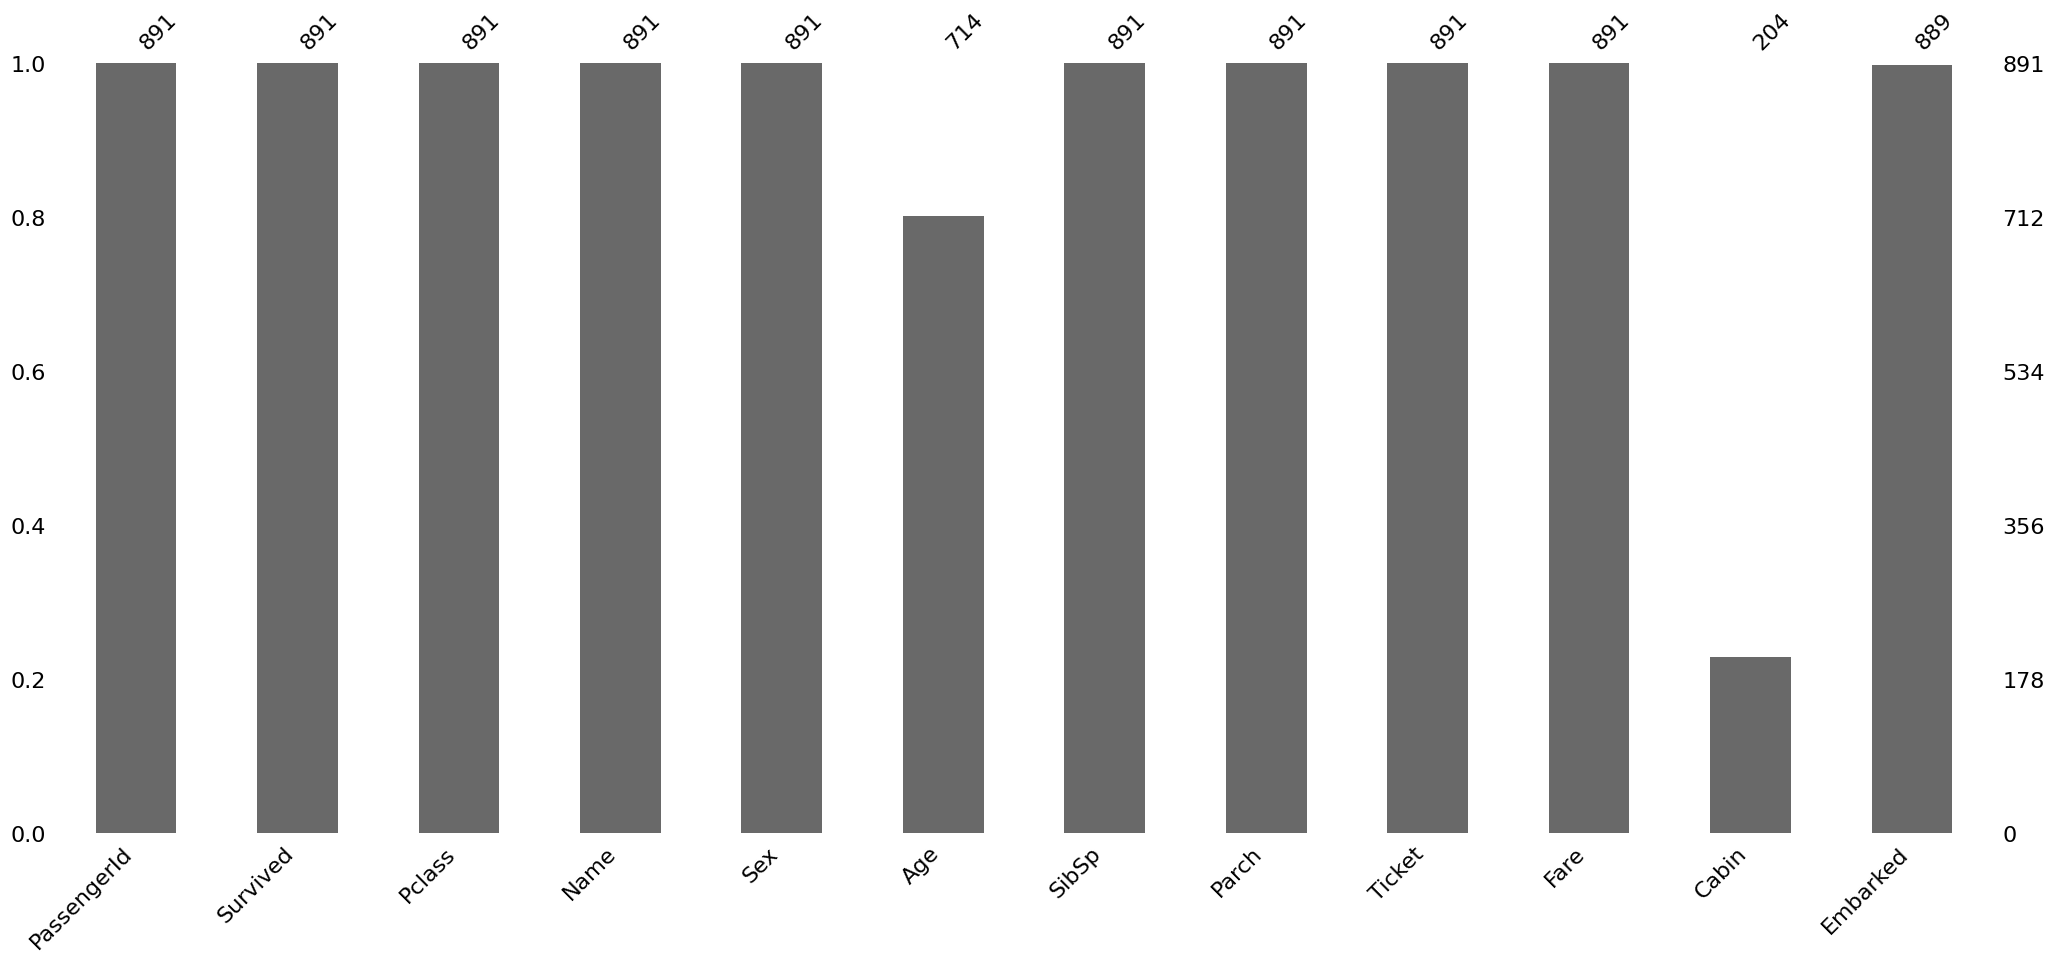

In [4]:
import missingno
missingno.bar(titanic_data)

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
# Drop unnecessary columns, irrelevant to the prediction of survived

titanic_data=titanic_data.drop(['Name','Ticket','Cabin'],axis=1)

In [8]:

# Fill missing 'Age' values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing 'Fare' values with the median fare
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode (most frequent value)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

<Axes: >

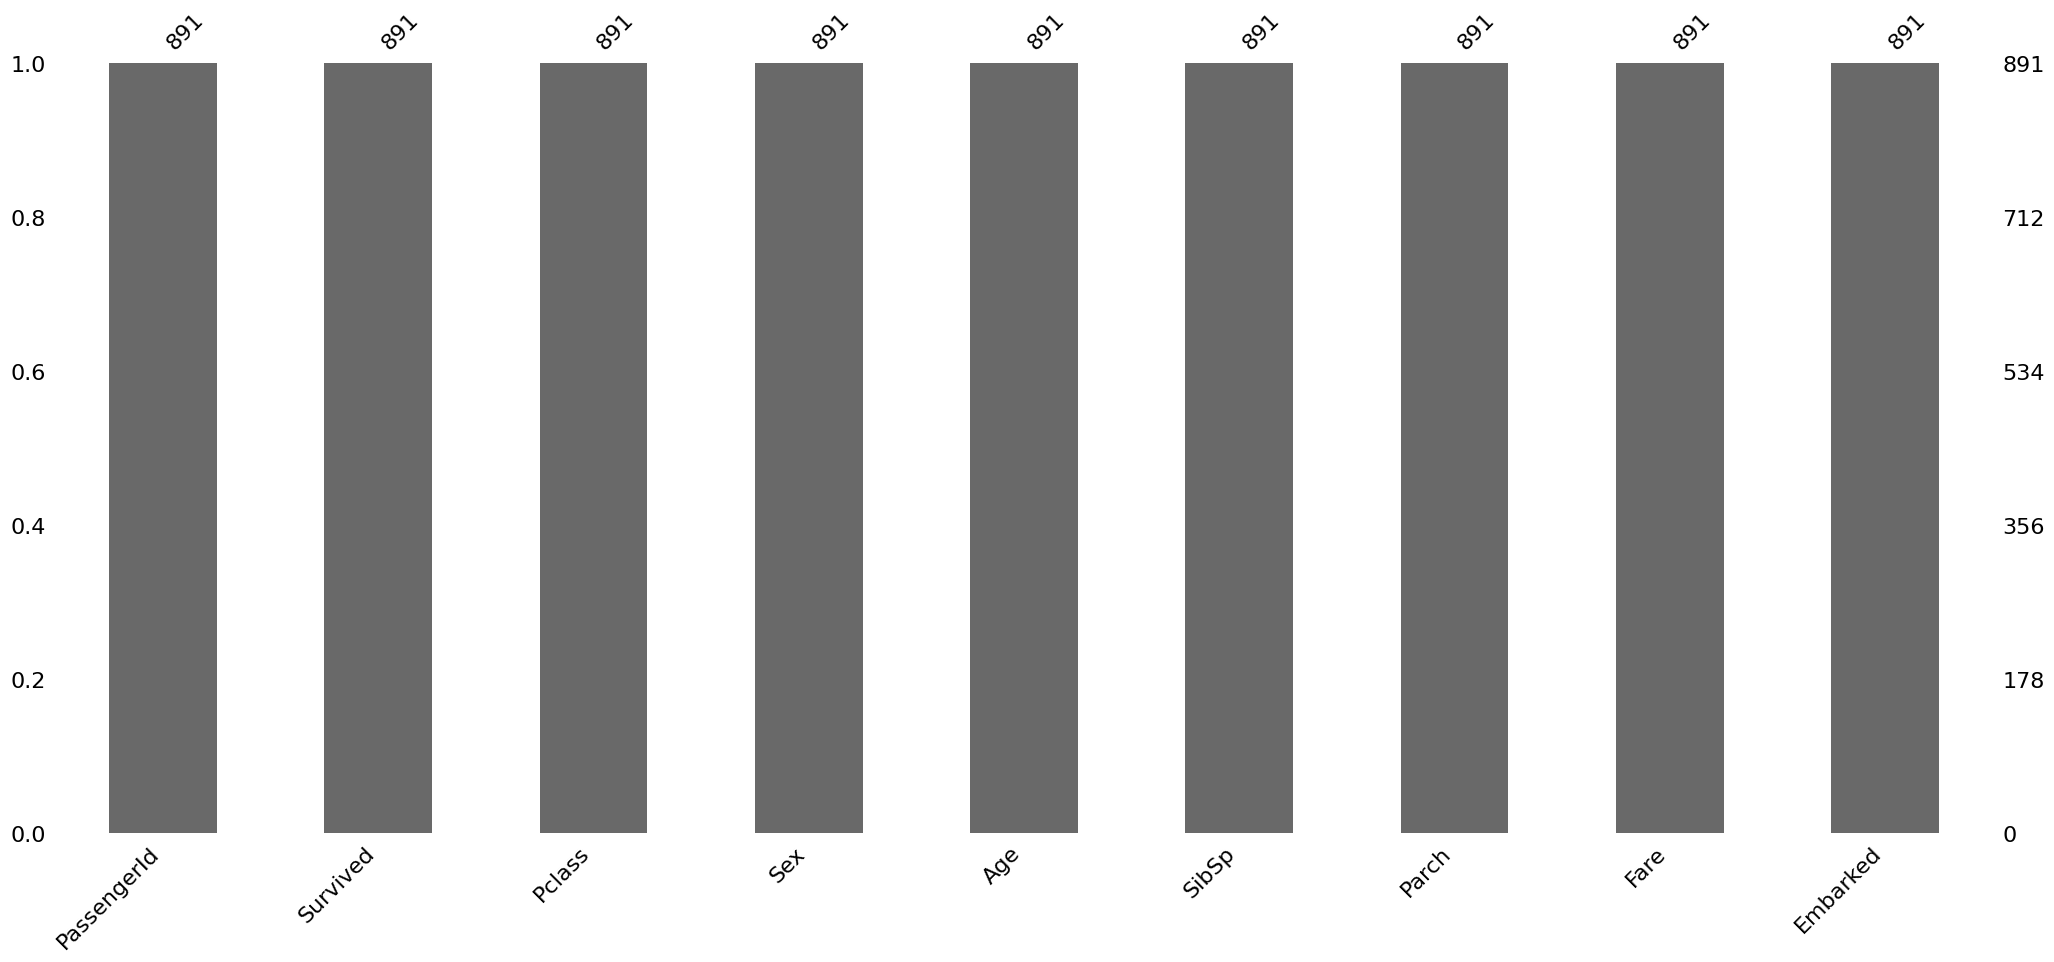

In [9]:
import missingno
missingno.bar(titanic_data)

In [10]:

# Convert 'Sex' and 'Embarked' to numerical values
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [11]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [12]:
# Split the data into features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)  #  'Survived' is the target variable
y = titanic_data['Survived']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Finally, the splitted the train and test as per ratio of 80:20. Also the model used to train are Logistic regression with best parameters.

In [13]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize Logistic Regression model
logreg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] #'newton-cg', 'lbfgs', 'sag'
}


# Perform GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy') # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameter for logistic regression model from GridSearchCV
best_logreg = grid_search.best_estimator_


# Make predictions on the test set
y_pred = best_logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(best_logreg)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

LogisticRegression(C=1, solver='liblinear')
Accuracy: 0.7932960893854749
Precision: 0.7681159420289855
Recall: 0.7162162162162162
F1 Score: 0.7412587412587412


The best parameter for logistic regression is C= 1 and solver linear.

In [14]:


from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_classifier = grid_search_rf.best_estimator_

# Make predictions using the best Random Forest model
y_pred_rf = best_rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(best_rf_classifier)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1 Score: {f1_rf}")

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)
Random Forest Accuracy: 0.8212290502793296
Random Forest Precision: 0.828125
Random Forest Recall: 0.7162162162162162
Random Forest F1 Score: 0.7681159420289855


The best parameter for Random Forest classifier  is found and also parameters like Accuracy, precision, recall and F1 score.

In [15]:
# Now train the model using Tensorflow based neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2) # Adjust epochs and batch size
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Test Accuracy: {accuracy}")

y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print(f"Neural Network Precision: {precision_nn}")
print(f"Neural Network Recall: {recall_nn}")
print(f"Neural Network F1 Score: {f1_nn}")

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6122 - loss: 49.2746 - val_accuracy: 0.6503 - val_loss: 12.1299
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6298 - loss: 8.2443 - val_accuracy: 0.3497 - val_loss: 2.6486
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5278 - loss: 1.7910 - val_accuracy: 0.3986 - val_loss: 1.3880
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5835 - loss: 0.9474 - val_accuracy: 0.6503 - val_loss: 0.7614
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6700 - loss: 0.7280 - val_accuracy: 0.6643 - val_loss: 0.6905
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6490 - loss: 0.6449 - val_accuracy: 0.6364 - val_loss: 0.6303
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6839 - loss: 0.5919 - val_accuracy: 0.6643 - val_loss: 0.6370
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6592 - loss: 0.6213 - val_accuracy: 0.6923 - val_lo

In [16]:
# Finally the model trained using Pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
# Convert data to PyTorch tensors
X = titanic_data.drop('Survived', axis=1).values
y = titanic_data['Survived'].values

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1) # Reshape y for binary classification


# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = torch.tensor(X, dtype=torch.float32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the neural network model
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model, define loss and optimizer
input_size = X_train.shape[1]
model = Net(input_size)
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
batch_size = 32
for epoch in range(num_epochs):
  for i in range(0, len(X_train), batch_size):
    inputs = X_train[i:i+batch_size]
    labels = y_train[i:i+batch_size]

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


# Evaluation
with torch.no_grad():
  y_pred = model(X_test)
  y_pred_classes = (y_pred > 0.5).float() # Convert probabilities to class labels
  accuracy = (y_pred_classes == y_test).sum().item() / len(y_test)

  print(f"PyTorch Neural Network Test Accuracy: {accuracy}")

Epoch [1/50], Loss: 0.6159
Epoch [2/50], Loss: 0.5038
Epoch [3/50], Loss: 0.3785
Epoch [4/50], Loss: 0.2960
Epoch [5/50], Loss: 0.2572
Epoch [6/50], Loss: 0.2404
Epoch [7/50], Loss: 0.2308
Epoch [8/50], Loss: 0.2222
Epoch [9/50], Loss: 0.2145
Epoch [10/50], Loss: 0.2080
Epoch [11/50], Loss: 0.2019
Epoch [12/50], Loss: 0.1962
Epoch [13/50], Loss: 0.1912
Epoch [14/50], Loss: 0.1864
Epoch [15/50], Loss: 0.1824
Epoch [16/50], Loss: 0.1791
Epoch [17/50], Loss: 0.1759
Epoch [18/50], Loss: 0.1732
Epoch [19/50], Loss: 0.1710
Epoch [20/50], Loss: 0.1688
Epoch [21/50], Loss: 0.1668
Epoch [22/50], Loss: 0.1651
Epoch [23/50], Loss: 0.1635
Epoch [24/50], Loss: 0.1615
Epoch [25/50], Loss: 0.1600
Epoch [26/50], Loss: 0.1590
Epoch [27/50], Loss: 0.1582
Epoch [28/50], Loss: 0.1574
Epoch [29/50], Loss: 0.1562
Epoch [30/50], Loss: 0.1554
Epoch [31/50], Loss: 0.1553
Epoch [32/50], Loss: 0.1547
Epoch [33/50], Loss: 0.1541
Epoch [34/50], Loss: 0.1540
Epoch [35/50], Loss: 0.1538
Epoch [36/50], Loss: 0.1537
E

In [17]:
precision_pt = precision_score(y_test.cpu().numpy(), y_pred_classes.cpu().numpy())
recall_pt = recall_score(y_test.cpu().numpy(), y_pred_classes.cpu().numpy())
f1_pt = f1_score(y_test.cpu().numpy(), y_pred_classes.cpu().numpy())

print(f"PyTorch Neural Network Precision: {precision_pt}")
print(f"PyTorch Neural Network Recall: {recall_pt}")
print(f"PyTorch Neural Network F1 Score: {f1_pt}")

PyTorch Neural Network Precision: 0.7971014492753623
PyTorch Neural Network Recall: 0.7432432432432432
PyTorch Neural Network F1 Score: 0.7692307692307693


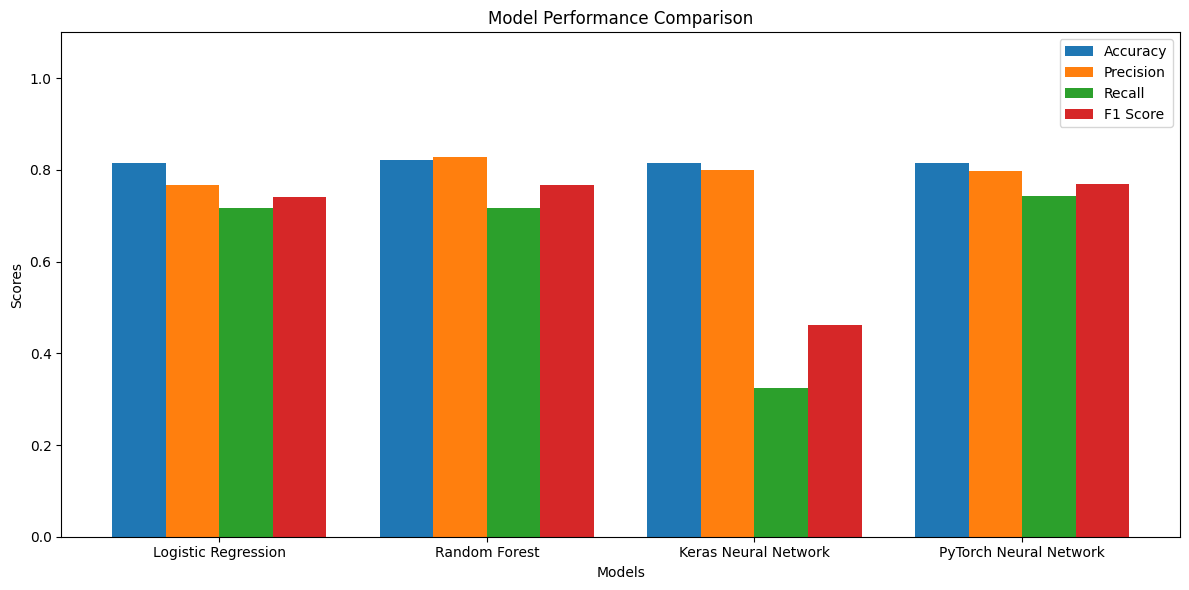

In [18]:

import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Keras Neural Network', 'PyTorch Neural Network']
accuracy_scores = [accuracy, accuracy_rf, accuracy, accuracy]
precision_scores = [precision, precision_rf, precision_nn, precision_pt]
recall_scores = [recall, recall_rf, recall_nn, recall_pt]
f1_scores = [f1, f1_rf, f1_nn, f1_pt]

x = range(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x, accuracy_scores, width=0.2, label='Accuracy')
plt.bar([i + 0.2 for i in x], precision_scores, width=0.2, label='Precision')
plt.bar([i + 0.4 for i in x], recall_scores, width=0.2, label='Recall')
plt.bar([i + 0.6 for i in x], f1_scores, width=0.2, label='F1 Score')


plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks([i + 0.3 for i in x], models)
plt.legend()
plt.ylim(0, 1.1) # Set y-axis limit to ensure 1 is fully visible
plt.tight_layout()
plt.show()

Summary, on the comparison of four models above, the performance of Random forest and Neural network ( comprising Pytorcch) performs well, in the titanic dataset in all parameters Accuracy, precision , Recall and f1 score.